In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [57]:
%matplotlib inline
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv('GS_Cleaned_Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,avg_salary,company_txt,Job state,same state,age,Python,R Studio,Spark,AWS,excel
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,72.0,Tecolote Research,NM,0,47,1,0,0,0,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,85.0,KnowBe4,FL,1,10,1,0,1,0,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1


In [5]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'Job state', 'same state', 'age', 'Python', 'R Studio', 'Spark', 'AWS',
       'excel'],
      dtype='object')

In [6]:
#Simplifying the titles and positions


In [7]:
def titlesimplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def position(title):
    if 'sr' in  title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr.' in title.lower() or 'jr' in title.lower():
        return 'junior'
    else:
        return 'na'
    

In [8]:
df['job_simplified']=df['Job Description'].apply(titlesimplifier)

In [9]:
df['job_simplified'].value_counts()

data scientist    308
na                149
analyst           105
data engineer      81
mle                65
director           34
Name: job_simplified, dtype: int64

In [10]:
df['seniority']=df['Job Title'].apply(position)

In [11]:
df['seniority'].value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [12]:
#fixing error for job state los angeles


In [13]:
df['Job state'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: Job state, dtype: int64

In [14]:
df['Job state']=df['Job state'].apply(lambda x: x.strip() if x.strip().lower() !='los angeles' else 'CA')

In [15]:
df['Job state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job state, dtype: int64

In [16]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'Job state', 'same state', 'age', 'Python', 'R Studio', 'Spark', 'AWS',
       'excel', 'job_simplified', 'seniority'],
      dtype='object')

In [17]:
#Competitor count

In [18]:
df['competitor count']= df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [19]:
df['competitor count']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: competitor count, Length: 742, dtype: int64

In [20]:
#Hourly wage to annual wage

In [21]:
df['min_salary']=df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)

In [22]:
df['max_salary']=df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [23]:
df['min_salary']

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: min_salary, Length: 742, dtype: int64

In [24]:
df['max_salary']

0       91
1      112
2       90
3       97
4      143
      ... 
737    111
738    133
739     91
740    160
741    126
Name: max_salary, Length: 742, dtype: int64

In [25]:
df[df.hourly==1][['min_salary','max_salary']]

,min_salary,max_salary
165,34,48
177,42,68
197,36,50
202,42,68
210,30,50
246,34,48
271,42,68
337,36,50
345,48,78
357,42,68


In [26]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,min_salary,max_salary,avg_salary,same state,age,Python,R Studio,Spark,AWS,excel,competitor count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,1.053908
std,214.341239,0.801210,497.183763,0.177034,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [27]:
df.drop('Unnamed: 0',axis=1, inplace =True)

In [28]:
#checking histogram for rating

<AxesSubplot:>

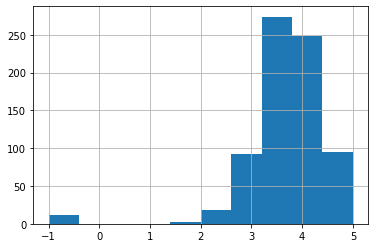

In [29]:
df['Rating'].hist()

<AxesSubplot:>

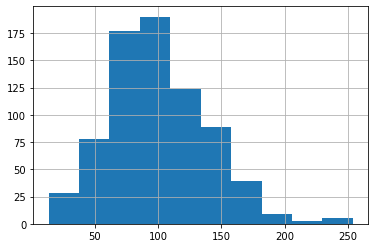

In [30]:
df['avg_salary'].hist()

<AxesSubplot:>

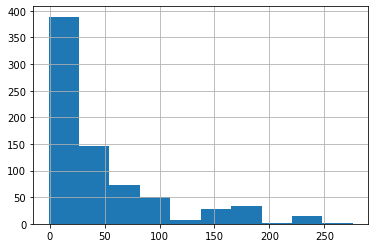

In [31]:
df.age.hist()

<AxesSubplot:>

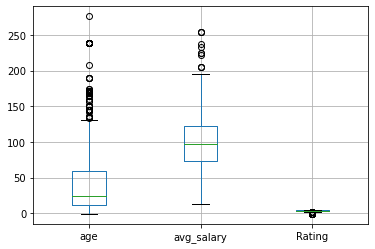

In [32]:
df.boxplot(column = ['age','avg_salary','Rating'])
#outliers present for age and avg_salary

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'Job state', 'same state', 'age', 'Python', 'R Studio', 'Spark', 'AWS',
       'excel', 'job_simplified', 'seniority', 'competitor count'],
      dtype='object')

In [34]:
df['desc_len']=df['Job Description'].apply(lambda x: len(x)) # adding description length to check correlation

In [35]:
df[['age','avg_salary','Rating','desc_len','competitor count']].corr() #as the age of the company increases, description length is also slightly higher

,age,avg_salary,Rating,desc_len,competitor count
age,1.000000,0.019655,0.021655,0.163911,0.126687
avg_salary,0.019655,1.000000,0.013492,0.078808,0.093813
Rating,0.021655,0.013492,1.000000,-0.012281,0.027190
desc_len,0.163911,0.078808,-0.012281,1.000000,0.104620
competitor count,0.126687,0.093813,0.027190,0.104620,1.000000


In [36]:
#building a heatmap using seaborn

<AxesSubplot:>

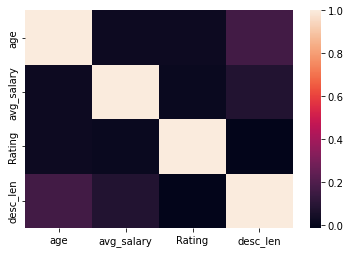

In [37]:
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr())

In [38]:
#using a custom color map

In [39]:
cmap = sns.diverging_palette(220,10,as_cmap = True)

<AxesSubplot:>

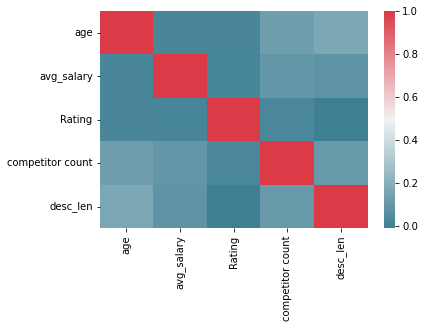

In [40]:
sns.heatmap(df[['age','avg_salary','Rating','competitor count','desc_len']].corr(),cmap = cmap)
#competitor count slightly higher as age increases

In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'Job state', 'same state', 'age', 'Python', 'R Studio', 'Spark', 'AWS',
       'excel', 'job_simplified', 'seniority', 'competitor count', 'desc_len'],
      dtype='object')

In [42]:
#categorical variables
df_cat =df[['Location', 'Headquarters', 'Size', 'Founded','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt',
       'Job state', 'age', 'Python', 'R Studio', 'Spark', 'AWS',
       'excel','job_simplified', 'seniority']]

graph for Location: total = 20


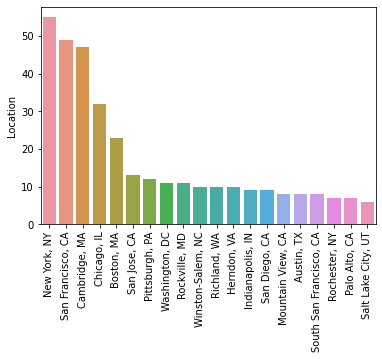

graph for Headquarters: total = 20


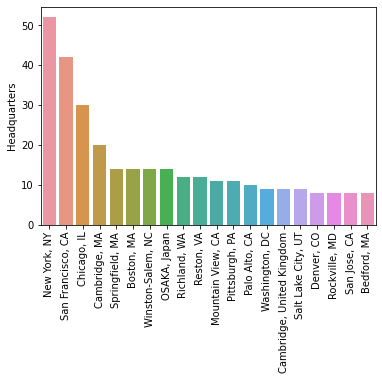

graph for Size: total = 9


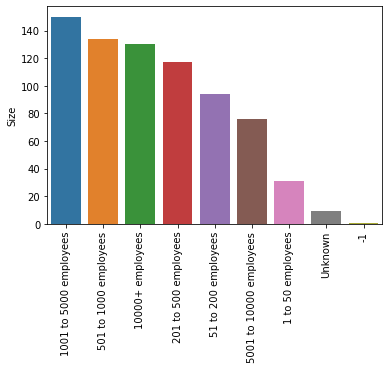

graph for Founded: total = 20


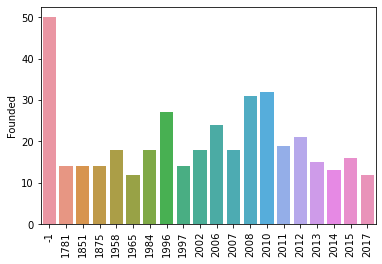

graph for Type of ownership: total = 11


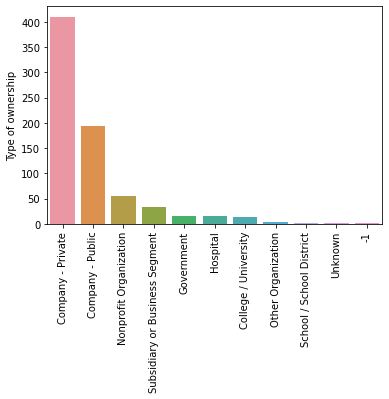

graph for Industry: total = 20


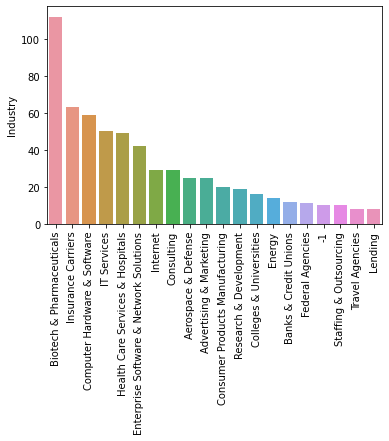

graph for Sector: total = 20


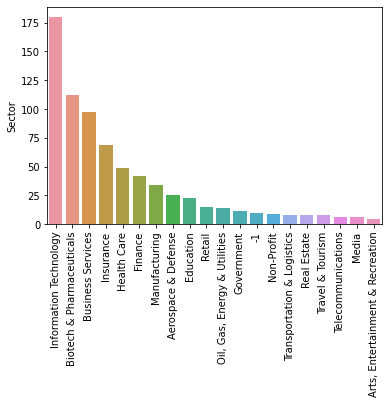

graph for Revenue: total = 14


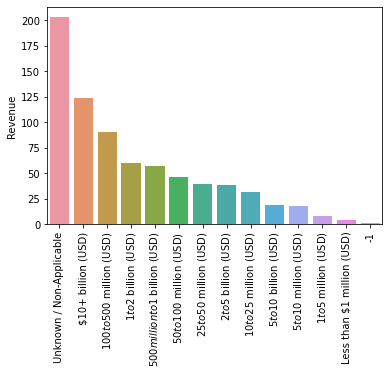

graph for company_txt: total = 20


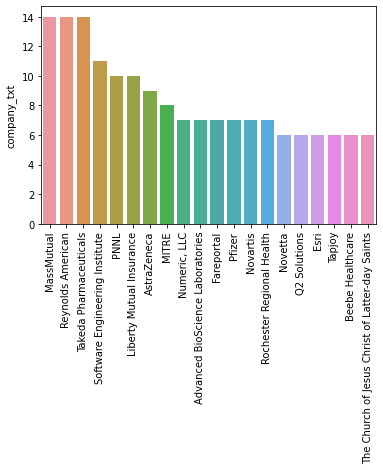

graph for Job state: total = 20


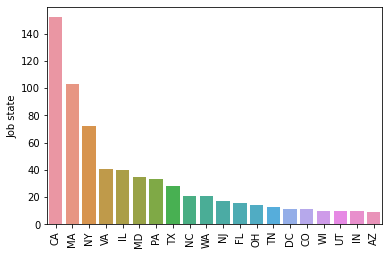

graph for age: total = 20


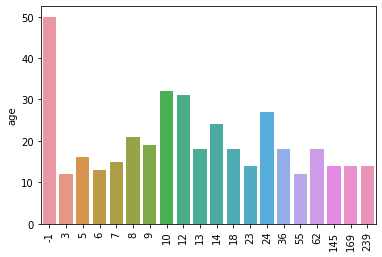

graph for Python: total = 2


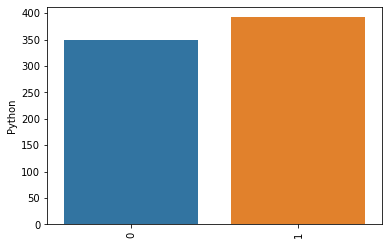

graph for R Studio: total = 2


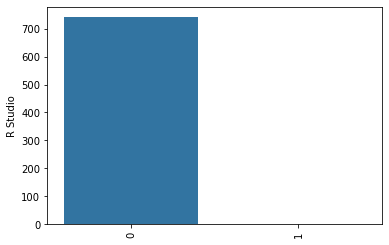

graph for Spark: total = 2


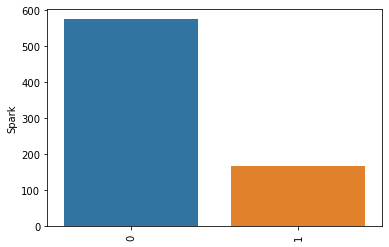

graph for AWS: total = 2


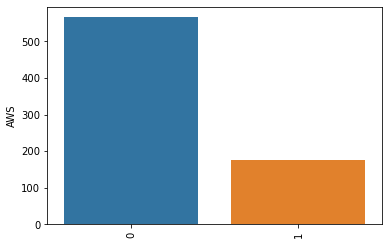

graph for excel: total = 2


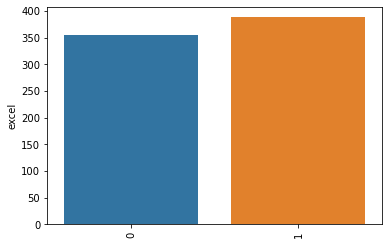

graph for job_simplified: total = 6


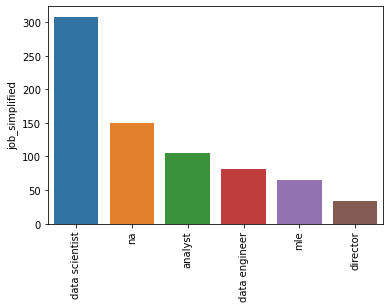

graph for seniority: total = 3


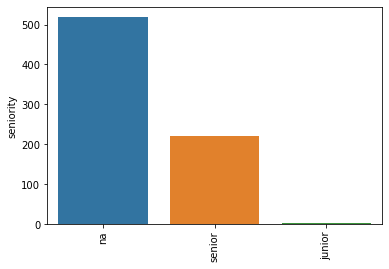

In [45]:
#limiting by top 20
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.pyplot.show()

In [103]:
#Major number of postings are by private organizations
#Company size decreases as employee cout decreases
#largest number of job posting is by IT, followed by Biotech and Pharma 
#125 job postings are by companies with revenues greater than 10 billion USD
#CA has the largest number of Job postings followed by MA
#python is the most sought after skill
#Highest demand is for data scientists
#junior level jobs are very less


In [46]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'Job state', 'same state', 'age', 'Python', 'R Studio', 'Spark', 'AWS',
       'excel', 'job_simplified', 'seniority', 'competitor count', 'desc_len'],
      dtype='object')

In [47]:
#pivot table

In [49]:
pd.pivot_table(df,index = 'job_simplified', values = 'avg_salary')

,avg_salary
job_simplified,
analyst,72.033333
data engineer,104.623457
data scientist,116.816558
director,95.485294
mle,106.353846
na,83.808725


In [50]:
pd.pivot_table(df,index = ['job_simplified','seniority'], values = 'avg_salary')

avg_salary
job_simplified seniority            
analyst        junior      71.000000
               na          65.614286
               senior      86.171875
data engineer  na          99.593750
               senior     123.558824
data scientist na         106.687805
               senior     136.975728
director       na          94.785714
               senior      98.750000
mle            na         100.940000
               senior     124.400000
na             na          70.279412
               senior     113.170213

In [55]:
pd.pivot_table(df,index = 'Job state', values = 'avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
Job state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [60]:
pd.pivot_table(df,index = ['Job state','job_simplified'], values = 'avg_salary', aggfunc='count').sort_values('avg_salary',ascending=False)

avg_salary
Job state job_simplified            
CA        data scientist          77
MA        data scientist          42
          na                      41
NY        data scientist          40
VA        data scientist          19
NY        analyst                 18
CA        mle                     17
          analyst                 16
          data engineer           16
MD        data scientist          15
IL        data scientist          15
TX        data scientist          14
CA        na                      13
          director                13
MD        na                      13
PA        mle                     13
WA        data scientist          11
MA        data engineer           10
NC        na                       9
PA        analyst                  8
IL        analyst                  8
NJ        analyst                  8
PA        data scientist           8
IL        na                       7
TX        na                       7
FL        data scientist           7
NJ        data scientist           6
NY        mle                      6
NC        data scientist           6
DE        na                       6
VA        analyst                  6
          na                       6
          data engineer            6
TX        data engineer            6
OH        data scientist           5
WI        analyst                  5
MD        data engineer            5
WA        mle                      5
AL        analyst                  5
IL        data engineer            5
TN        na                       5
DC        data scientist           5
UT        analyst                  4
OH        mle                      4
VA        mle                      4
MO        data scientist           4
MI        data scientist           4
TN        data engineer            4
OR        data scientist           4
NY        director                 4
NE        na                       4
WI        director                 4
MA        analyst                  4
KY        na                       4
IN        mle                      4
FL        analyst                  4
CT        na                       3
LA        na                       3
CO        data scientist           3
IA        data engineer            3
NY        data engineer            3
GA        director                 3
UT        data scientist           3
AZ        data engineer            3
OH        na                       3
CO        data engineer            3
FL        data engineer            3
IL        director                 3
AZ        data scientist           3
DC        data engineer            3
PA        na                       3
CO        na                       3
WA        analyst                  3
NM        data scientist           3
UT        data engineer            3
MA        director                 3
          mle                      3
NC        director                 3
IN        data scientist           3
NC        data engineer            3
KS        mle                      3
IN        na                       3
NJ        data engineer            2
CT        data scientist           2
TN        data scientist           2
DC        analyst                  2
TN        analyst                  2
KY        data scientist           2
AZ        na                       2
MI        na                       2
MN        na                       2
FL        na                       2
MO        analyst                  2
OH        analyst                  2
GA        data scientist           2
MO        na                       2
IA        analyst                  2
IL        mle                      2
WA        na                       1
CO        analyst                  1
AL        data scientist           1
          na                       1
WI        data scientist           1
AZ        analyst                  1
WA        director                 1
GA        analyst                  1
CO        mle                 

In [65]:
#data scientists avg salary
pd.pivot_table(df[df.job_simplified == 'data scientist'],index = 'Job state', values = 'avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
Job state,
DC,153.200000
CA,142.142857
UT,140.500000
IL,126.400000
NJ,125.083333
NY,112.587500
NC,111.916667
WA,111.318182
PA,109.625000


In [66]:
#checking values by rating, industry, skillset etc..

In [67]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'Job state', 'same state', 'age', 'Python', 'R Studio', 'Spark', 'AWS',
       'excel', 'job_simplified', 'seniority', 'competitor count', 'desc_len'],
      dtype='object')

In [82]:
df_pivot = df[['Rating', 'Industry','Sector','Revenue','company_txt','AWS','Python','R Studio','excel','avg_salary']]

In [87]:
for i in df_pivot.columns:
    print(i)
    if(i !='avg_salary'): # to prevent comparison against same field
        print(pd.pivot_table(df_pivot, index = i, values = 'avg_salary'))

Rating
        avg_salary
Rating            
-1.0    136.181818
 1.9     87.500000
 2.1     95.900000
 2.2     97.750000
 2.3     81.500000
 2.4     60.214286
 2.5    120.000000
 2.6    109.083333
 2.7     83.250000
 2.8     83.928571
 2.9     81.138889
 3.0     85.588235
 3.1     86.580000
 3.2    105.500000
 3.3    101.858974
 3.4     93.011364
 3.5    104.897959
 3.6     85.467391
 3.7    104.131148
 3.8     96.811475
 3.9    113.071429
 4.0    105.340426
 4.1    116.368421
 4.2    100.442308
 4.3    102.468750
 4.4    108.606061
 4.5    117.714286
 4.6     97.250000
 4.7    103.983871
 4.8     80.277778
 5.0    134.700000
Industry
                                          avg_salary
Industry                                            
-1                                        114.650000
Accounting                                113.500000
Advertising & Marketing                   104.300000
Aerospace & Defense                        99.060000
Architectural & Engineering Services   

In [86]:
df.to_csv('eda_data.csv')